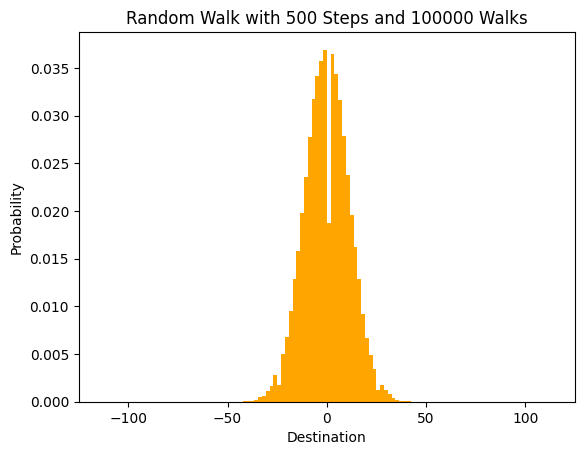

In [1]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 500
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        d += 1 if (random.uniform(0, 1) > 0.5) else -1
    destination.append(int(d / 2))
n, bins, patches = plt.hist(destination, 51, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()


This distribution is very strange, as it shows a decrease in the probability around 0.

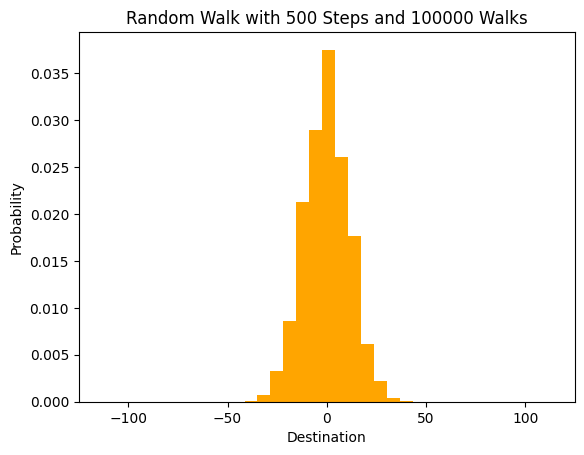

In [5]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 500
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(int(d / 2))
n, bins, patches = plt.hist(destination, 15, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()


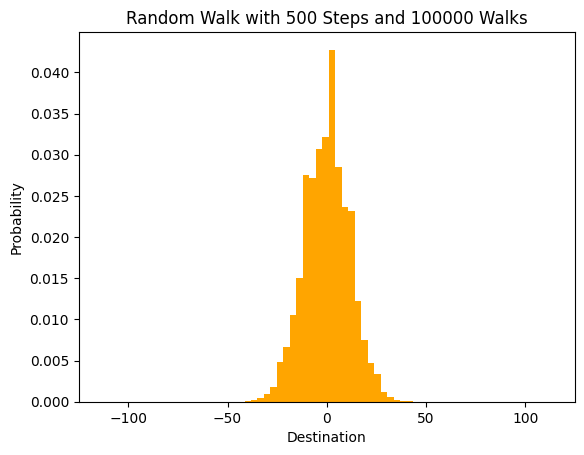

In [6]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 500
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(int(d / 2))
n, bins, patches = plt.hist(destination, 30, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()

It seems like this bug was caused by the number of bins. The starting number of bins was 51, which is an odd number. This caused the bin to be centered around 0. I am assuming that the bin for 0 extended for a range such that it only included data for that one destination data point. Changing the number of bins to 30 or 15 fixed the problem.

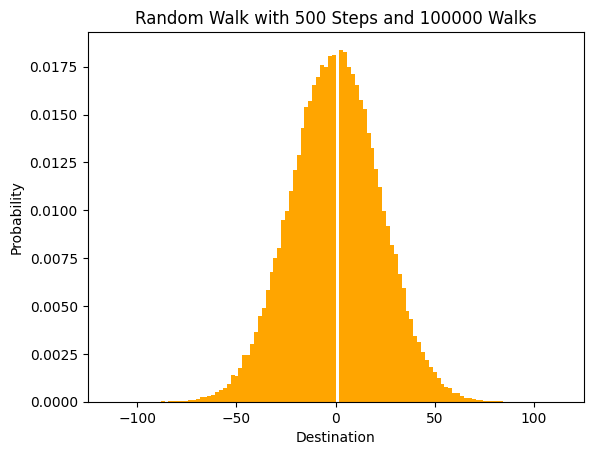

In [5]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 500
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(d)
n, bins, patches = plt.hist(destination, 100, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()

apparently the bug is not fixed by adding more bins. I am not sure why this is happening. Something is going on around 0 that causes that bin to be very small.

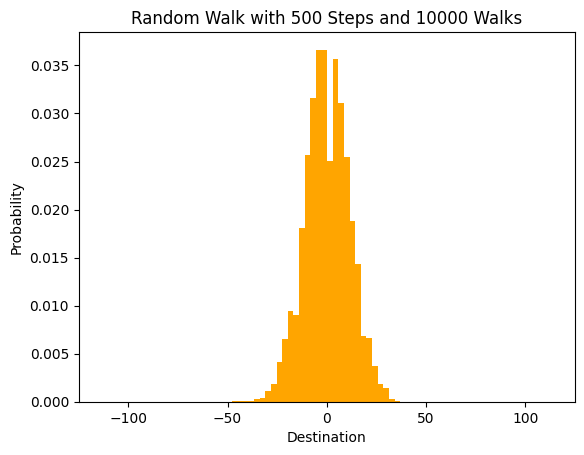

In [6]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 10000
steps = 500
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(int(d / 2))
n, bins, patches = plt.hist(destination, 30, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()

This is a plot with 10000 walks and 500 steps.

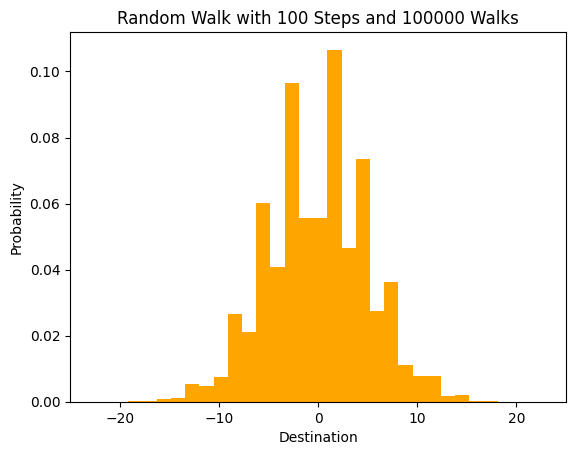

In [8]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 100
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(int(d / 2))
n, bins, patches = plt.hist(destination, 30, density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()

Now there appears to be some funky stuff going on with the distribution. I will try getting rid of the integer truncating on the "destination.append" line, and shifting the x limits.

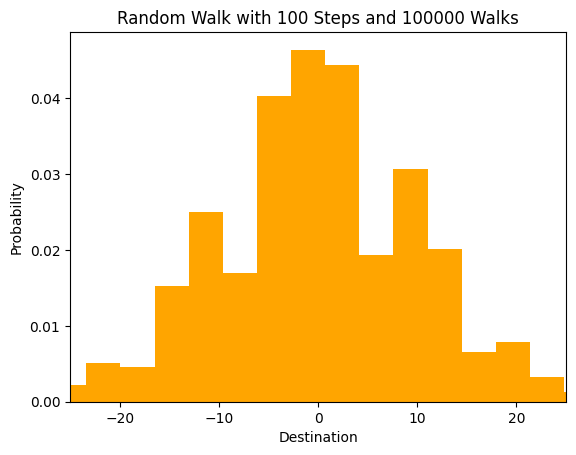

In [11]:
#!/usr/bin/env python3


import random
import matplotlib.pyplot as plt

random.seed(0)

walks = 100000
steps = 100
destination = []

for w in range(walks):
    d = 0
    for s in range(steps):
        if (random.uniform(0, 1) > 0.5):
            d += 1
        else:
            d -= 1
    destination.append(d)
n, bins, patches = plt.hist(destination, int(steps / 4), density=True, facecolor="orange")

plt.xlabel("Destination")
plt.ylabel("Probability")
plt.title("Random Walk with " + str(steps) + " Steps and " + str(walks) + " Walks")
plt.xlim(int(-steps / 4), int(steps / 4))
plt.ylim(0)
plt.show()

regardless of the bug, the width of the plot seems to increase with a greater number of steps, as we would expect to happen with more possible equally likely outcomes.